In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('../data/raw/Customer-Churn-Records.csv')

# Primeras observaciones
print(f"Dimensiones: {df.shape}")
print(f"\nPrimeras 5 filas:\n{df.head()}")
print(f"\nTipos de datos:\n{df.dtypes}")
print(f"\nInformación general:\n{df.info()}")


Dimensiones: (10000, 18)

Primeras 5 filas:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1        

In [11]:
# Valores nulos
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
print(pd.DataFrame({'Missing': missing, 'Percentage': missing_pct}))


                    Missing  Percentage
RowNumber                 0         0.0
CustomerId                0         0.0
Surname                   0         0.0
CreditScore               0         0.0
Geography                 0         0.0
Gender                    0         0.0
Age                       0         0.0
Tenure                    0         0.0
Balance                   0         0.0
NumOfProducts             0         0.0
HasCrCard                 0         0.0
IsActiveMember            0         0.0
EstimatedSalary           0         0.0
Exited                    0         0.0
Complain                  0         0.0
Satisfaction Score        0         0.0
Card Type                 0         0.0
Point Earned              0         0.0


In [12]:
# Separar variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Variables numéricas:\n", df[numeric_cols].describe())
print("\nVariables categóricas:\n", df[categorical_cols].describe())


Variables numéricas:
          RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min

Clientes que se quedaron: 7962 (79.6%)
Clientes que abandonaron: 2038 (20.4%)


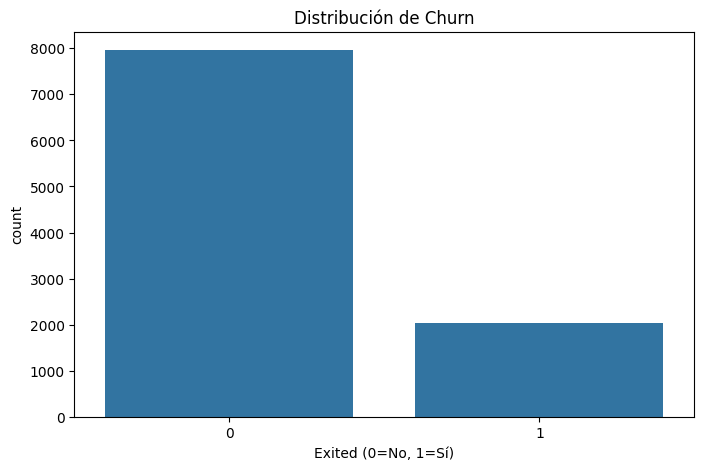

In [13]:
# Distribución de Churn
churn_counts = df['Exited'].value_counts()
churn_pct = df['Exited'].value_counts(normalize=True) * 100

print(f"Clientes que se quedaron: {churn_counts[0]} ({churn_pct[0]:.1f}%)")
print(f"Clientes que abandonaron: {churn_counts[1]} ({churn_pct[1]:.1f}%)")

# Gráfico
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Exited')
plt.title('Distribución de Churn')
plt.xlabel('Exited (0=No, 1=Sí)')
plt.savefig('../reports/figures/churn_distribution.png', dpi=300, bbox_inches='tight')
